In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [2]:
images_paths = glob.glob('./../data_v2/images/Image*.png')
mask_paths = glob.glob('./../data_v2/masks/mask*.png')

images_paths.sort()
mask_paths.sort()

In [3]:
len(images_paths), len(mask_paths)

(10000, 10000)

In [4]:
def getBoundingBox(mask):

    # Create a copy of the image
    _mask = mask.copy()

    # Perform opening on the image to reduce dark regions withing the objects
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(_mask, cv2.MORPH_OPEN, kernel)

    # Get contours of the object
    contours, hierarchy = cv2.findContours(opening,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) 

    # Sort contours by size
    # This function will sort by area in ascending order
    cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))

    # Get the last element, as it will be the largest box
    x,y,w,h = cv2.boundingRect(cntsSorted[-1])

    del _mask, opening, contours, cntsSorted

    return x,y,w,h

In [5]:
def drawBoundingBox(image, coordinates):

    # Create a copy of the image
    _image = image.copy()

    # Separate each coordinate
    x,y,w,h = coordinates

    # Draw rectangle on new image
    cv2.rectangle(_image,(x,y),(x+w,y+h),(200,0,0),2)

    return _image

In [6]:
def convertToYoloCoordinates(image_size, coordinates):
    
    # Separate each coordinate
    x,y,w,h = coordinates

    label = 0

    # Convert coordinates
    # X 
    _x = (x+(w/2))/image_size[0]

    # Y 
    _y = (y+(h/2))/image_size[1]

    # width 
    _width = w/image_size[0]

    # height 
    _height = h/image_size[1]

    return _x, _y, _width, _height




(269, 310, 131, 79)
(0.669, 0.699, 0.262, 0.158)


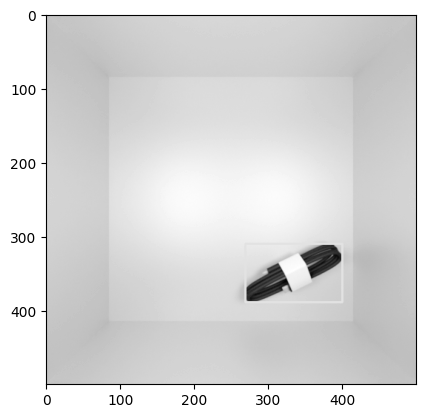

In [7]:
image = cv2.imread(images_paths[0], cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_paths[0], cv2.IMREAD_GRAYSCALE)

coordinates = getBoundingBox(mask)
print(coordinates)

yolo_coordinates = convertToYoloCoordinates(image.shape, coordinates)
print(yolo_coordinates)

tmp_image = drawBoundingBox(image, coordinates)

plt.imshow(tmp_image, cmap='gray')
plt.show()

In [8]:
label_filename = images_paths[0].replace('.png', '.txt').replace('images', 'labels')
print(label_filename)
x,y,w,h = yolo_coordinates

with open(label_filename, "w") as labelfile:
    labelfile.write(f'{0}\t{x}\t{y}\t{w}\t{h}')


./../data_v2/labels/Image0001.txt


In [9]:
for i in range(len(images_paths)):
    image = cv2.imread(images_paths[i], cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_paths[i], cv2.IMREAD_GRAYSCALE)

    coordinates = getBoundingBox(mask)

    yolo_coordinates = convertToYoloCoordinates(image.shape, coordinates)

    label_filename = images_paths[i].replace('.png', '.txt').replace('images', 'labels')

    x,y,w,h = yolo_coordinates

    with open(label_filename, "w") as labelfile:
        labelfile.write(f'{0}\t{x}\t{y}\t{w}\t{h}')

    del image, mask
